In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import os
import textwrap
from io import StringIO
from tabulate import tabulate
from collections import Counter
from wordcloud import WordCloud

In [2]:
def Save_Genreal_Report(corr_matrix, dup, head, tail, des, null, info, shape):
   
     try:
        folder_path = input("Enter the full path or name of the folder to save the report and heatmap: ").strip()
        os.makedirs(folder_path, exist_ok=True)
        report = os.path.join(folder_path, "report.txt")
        heatmap_file = os.path.join(folder_path, "correlation_heatmap.png")
       

        rows, cols = corr_matrix.shape
        max_label_length = max(len(label) for label in corr_matrix.columns)

        fig_width = max(8, cols * 0.5, max_label_length * 0.5)
        fig_height = max(6, rows * 0.5)

        plt.figure(figsize=(fig_width, fig_height))
        plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
        plt.colorbar()
        plt.xticks(np.arange(cols), corr_matrix.columns, rotation=45, ha="right", fontsize=12)
        plt.yticks(np.arange(rows), corr_matrix.columns, rotation=0, fontsize=12)
        plt.title('Correlation Matrix Heatmap', fontsize=14)
        plt.tight_layout()
        plt.savefig(heatmap_file)  
        plt.close()
        with open(report, 'w') as f:
            f.write("GENERAL ANALYSIS OF THE DATAFRAME\n")
            f.write("*" * 50 + "\n\n")
            f.write("-" * 50 + "\n")
            f.write(f"Shape of DataFrame: {shape}\n")
            f.write("-" * 50 + "\n\n\n")
            f.write("-" * 50 + "\n")
            f.write("Column Information:\n")
            f.write("-" * 50 + "\n")
            f.write(info + "\n") 
            f.write("\n\n\n")
            f.write("-" * 50 + "\n")
            f.write("Missing Values in Each Column:\n")
            f.write("-" * 50 + "\n")
            f.write(str(null) + "\n")
            f.write("\n\n\n")
            f.write("-" * 50 + "\n")
            f.write("Descriptive Statistics (Numerical):\n")
            f.write("-" * 50 + "\n")
            f.write(str(des) + "\n")
            # f.write(tabulate(des, headers='keys', tablefmt='psql'))
            f.write("\n\n\n")
            f.write("-" * 50 + "\n")
            f.write("First 5 Rows of the DataFrame:\n")
            f.write("-" * 50 + "\n")
            f.write(str(head) + "\n")
            f.write("\n\n\n")
            f.write("-" * 50 + "\n")
            f.write("Last 5 Rows of the DataFrame:\n")
            f.write("-" * 50 + "\n")
            f.write(str(tail) + "\n")
            f.write("\n\n\n")
            f.write("-" * 50 + "\n")
            f.write(f"Number of Duplicate Rows: {dup}\n")
            f.write("-" * 50 + "\n\n\n")
            f.write("-" * 50 + "\n")
            f.write("Correlation Matrix (Numerical Columns):\n")
            f.write("-" * 50 + "\n")
            f.write(str(corr_matrix) + "\n")
            f.write("\n\n")
        
        print(f"Report successfully saved as '{report}'.")
     except Exception as e:
        print(f"Error: {e}")

    

In [3]:

def General_Analysis(df):
    print("\n" + "=" * 60)
    print("GENERAL ANALYSIS OF THE DATAFRAME".center(60))
    print("=" * 60 + "\n")
    
    pd.options.display.float_format = '{:,.2f}'.format
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 200)
    shape = df.shape
    print("-" * 60)
    print(f"Shape of DataFrame: {shape}")
    print("-" * 60 + "\n")
    print("COLUMN INFORMATION".center(60, "-"))
    buffer = StringIO()
    df.info(buf=buffer)
    info = buffer.getvalue()
    print(info)
    print("\n")
    print("MISSING VALUES IN EACH COLUMN".center(60, "-"))
    null_values = df.isnull().sum()
    print(null_values)
    print("\n")
    numdf = df.select_dtypes(include=['number']).dropna()
    print("DESCRIPTIVE STATISTICS (NUMERICAL)".center(60, "-"))
    des = numdf.describe()
    print(tabulate(des, headers='keys', tablefmt='psql'))
    print("\n")
    print("FIRST 5 ROWS OF THE DATAFRAME".center(60, "-"))
    head = df.head()
    print(tabulate(head, headers='keys', tablefmt='psql'))
    print("\n")
    print("LAST 5 ROWS OF THE DATAFRAME".center(60, "-"))
    tail = df.tail()
    print(tabulate(tail, headers='keys', tablefmt='psql'))
    print("\n")
    print("DUPLICATE ROWS".center(60, "-"))
    dup = df.duplicated().sum()
    print(f"Number of Duplicate Rows: {dup}")
    print("\n")
    print("CORRELATION MATRIX (NUMERICAL COLUMNS)".center(60, "-"))
    corr_matrix = numdf.corr()
    print(tabulate(corr_matrix, headers='keys', tablefmt='psql'))
    print("\n")
    rows, cols = corr_matrix.shape
    max_label_length = max(len(label) for label in corr_matrix.columns)
    fig_width = max(8, cols * 0.5, max_label_length * 0.5)
    fig_height = max(6, rows * 0.5)
    plt.figure(figsize=(fig_width, fig_height))
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(np.arange(cols), corr_matrix.columns, rotation=45, ha="right", fontsize=12)
    plt.yticks(np.arange(rows), corr_matrix.columns, rotation=0, fontsize=12)
    plt.title('Correlation Matrix Heatmap', fontsize=14)
    plt.tight_layout()
    plt.show()

    save = input('Save General Report? (Y/N): ')
    if save.lower()=="y":
        Save_Genreal_Report(corr_matrix, dup, head, tail, des, null_values, info, shape)



 
    


In [21]:
def Custom_Analysis(df, col1, col2, num):
    col_names = {col.lower(): col for col in df.columns}
    col1_actual = col_names.get(col1.lower())
    col2_actual = col_names.get(col2.lower())
    if not col1_actual or not col2_actual:
        print(f"❌ Error: One or both columns '{col1}' or '{col2}' not found in DataFrame.")
        return
    
    if not pd.api.types.is_numeric_dtype(df[col1_actual]):
        print(f"❌ Error: Column '{col1_actual}' is not numeric.")
        return
    
    if not pd.api.types.is_numeric_dtype(df[col2_actual]):
        print(f"❌ Error: Column '{col2_actual}' is not numeric.")
        return

    # # Convert columns to numeric (handle errors)
    df[col1_actual] = pd.to_numeric(df[col1_actual], errors='coerce')
    df[col2_actual] = pd.to_numeric(df[col2_actual], errors='coerce')

    # # Handle missing values
    df.dropna(inplace=True)  # Remove rows with NaNs
    # # OR: Fill missing values with mean
    # df[col1_actual].fillna(0, inplace=True)
    # df[col2_actual].fillna(0, inplace=True)

    # # Remove duplicates
    # df.drop_duplicates(inplace=True)
    column1_data = df[col1_actual]
    column2_data = df[col2_actual]

    print("=============================== Preview ================================")
    column1_data_df = column1_data.head().to_frame()
    column2_data_df = column2_data.head().to_frame()
    print(f"Data for {col1_actual}:\n", tabulate(column1_data_df, headers='keys', tablefmt='psql'), "\n")
    print(f"Data for {col2_actual}:\n", tabulate(column2_data_df, headers='keys', tablefmt='psql'), "\n")
    print(f"================================ Summary Statistics for {col1_actual} ======================================")
    column1_stats = column1_data.describe()

    # Convert the statistics to a DataFrame
    column1_stats_df = column1_stats.to_frame().reset_index()
    print(tabulate(column1_stats_df, headers=['Statistic', col1_actual], tablefmt='psql'), "\n")
    
    print(f"====================================== Summary Statistics for {col2_actual} ========================================")
    column2_stats = column2_data.describe()

    # Convert the statistics to a DataFrame
    column2_stats_df = column2_stats.to_frame().reset_index()
    print(tabulate(column2_stats_df, headers=['Statistic', col2_actual], tablefmt='psql'), "\n")
    # print(column2_data.describe(), "\n")
    null_count_col1 = column1_data.isnull().sum()
    empty_count_col1 = (column1_data.eq('')).sum()
    null_count_col2 = column2_data.isnull().sum()
    empty_count_col2 = (column2_data.eq('')).sum()
    print(f"Null values in {col1_actual}: {null_count_col1}")
    print(f"Empty values in {col1_actual}: {empty_count_col1}\n")
    
    print(f"Null values in {col2_actual}: {null_count_col2}")
    print(f"Empty values in {col2_actual}: {empty_count_col2}\n")
    correlation = column1_data.corr(column2_data)
    print(f"Correlation between {col1_actual} and {col2_actual}: {correlation}\n")

    plt.figure(figsize=(12, 10))

   
    sample_df = df.sample(n=1000, random_state=42)  # Reduce to 1000 points
   

    plt.subplot(2, 2, 1)

# Add jitter to spread overlapping points
    jitter_x = np.random.normal(0, 0.05, size=len(sample_df[col1_actual]))
    jitter_y = np.random.normal(0, 0.05, size=len(sample_df[col2_actual]))

    plt.scatter(sample_df[col1_actual] + jitter_x, sample_df[col2_actual] + jitter_y, alpha=0.3)
    plt.xlabel(col1_actual)
    plt.ylabel(col2_actual)
    plt.title("Scatter Plot (Jittered)")

    


    plt.subplot(2, 2, 2)

# Smooth the data using rolling mean
    rolling_window = 500  # Adjust as needed
    df['RollingMean'] = df[col2_actual].rolling(window=rolling_window, min_periods=1).mean()

    # Create a clean line plot with markers
    plt.plot(df.index, df['RollingMean'], linestyle='-')

    plt.xlabel(col1_actual)
    plt.ylabel(col2_actual)
    plt.title(f"Line Plot (Smoothed, Window={rolling_window})")
    plt.grid(True, linestyle='--', alpha=0.5)  # Optional: Add grid for readability



    plt.subplot(2, 2, 3)
    plt.hist(df[col1_actual], bins=30, alpha=0.7, density=True, color='darkblue', label=col1_actual)  
    plt.hist(df[col2_actual], bins=30, alpha=0.7, density=True, color='darkred', label=col2_actual)  
    plt.legend()
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title("Histogram (Optimized)")



    plt.subplot(2, 2, 4)
    corr_matrix = df[[col1_actual, col2_actual]].corr()
    plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar()
    plt.xticks([0, 1], [col1_actual, col2_actual], rotation=45)
    plt.yticks([0, 1], [col1_actual, col2_actual])
    plt.title("Correlation Heatmap")

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

    # print(1)
    # col_names = {col.lower(): col for col in df.columns}
    # print(2)
    # col1_actual = col_names.get(col1.lower())
    # print(3)
    # col2_actual = col_names.get(col2.lower())
    # print(4)
    # if not col1_actual or not col2_actual:
    #     print(f"❌ Error: One or both columns '{col1}' or '{col2}' not found in DataFrame.")
    #     return

    # # Extracting column data
    # df[col1_actual] = pd.to_numeric(df[col1_actual], errors='coerce')
    # print(5)

    # column1_data = df[col1_actual]
    # print(6)
    # column2_data = df[col2_actual]
    # print(7)

    # # ====== Data Cleaning ======
    # df = df[[col1_actual, col2_actual]].copy()  # Keep only relevant columns
    # print(8)
    # df.fillna(0, inplace=True)  # Replace NaN values with 0
    # print(9)
    # df = df.drop_duplicates()  # Remove duplicate rows
    # print(10)
    
    # # Check if the column contains only non-numeric data
    # if pd.to_numeric(df[col1_actual], errors='coerce').isna().all():
    #     print(f"❌ Error: Column '{col1_actual}' contains only non-numeric data.")
    #     return
    # if pd.to_numeric(df[col2_actual], errors='coerce').isna().all():
    #     print(f"❌ Error: Column '{col2_actual}' contains only non-numeric data.")
    #     return
   
    
    # df[col1_actual] = pd.to_numeric(df[col1_actual], errors='coerce')  # Ensure numeric
    # print(11)
    # df[col2_actual] = pd.to_numeric(df[col2_actual], errors='coerce')
    # print(12)
    # df.fillna(0, inplace=True)  # Replace NaNs after type conversion with 0
    # print(13)
    # df = df[(df[col1_actual] >= 0) & (df[col2_actual] >= 0)]  # Remove negative values
    # print(7)
    
    # print("=============================== Preview ================================")
    # print(f"Data for {col1_actual}:")
    # print(tabulate(df[[col1_actual]].head(), headers='keys', tablefmt='psql'), "\n")
    # print(f"Data for {col2_actual}:")
    # print(tabulate(df[[col2_actual]].head(), headers='keys', tablefmt='psql'), "\n")
    
    # print(f"================================ Summary Statistics for {col1_actual} ======================================")
    # print(tabulate(df[col1_actual].describe().to_frame().reset_index(), headers=['Statistic', col1_actual], tablefmt='psql'), "\n")
    
    # print(f"================================ Summary Statistics for {col2_actual} ======================================")
    # print(tabulate(df[col2_actual].describe().to_frame().reset_index(), headers=['Statistic', col2_actual], tablefmt='psql'), "\n")
    
    # null_count_col1 = column1_data.isnull().sum()
    # null_count_col2 = column2_data.isnull().sum()
    # print(f"Null values in {col1_actual}: {null_count_col1}")
    # print(f"Null values in {col2_actual}: {null_count_col2}\n")
    
    # correlation = df[col1_actual].corr(df[col2_actual])
    # print(f"Correlation between {col1_actual} and {col2_actual}: {correlation}\n")
    
    # plt.figure(figsize=(12, 10))
    
    # sample_df = df.sample(n=min(1000, len(df)), random_state=42)  # Sample up to 1000 points
    
    # plt.subplot(2, 2, 1)
    # jitter_x = np.random.normal(0, 0.05, size=len(sample_df[col1_actual]))
    # jitter_y = np.random.normal(0, 0.05, size=len(sample_df[col2_actual]))
    # plt.scatter(sample_df[col1_actual] + jitter_x, sample_df[col2_actual] + jitter_y, alpha=0.3)
    # plt.xlabel(col1_actual)
    # plt.ylabel(col2_actual)
    # plt.title("Scatter Plot (Jittered)")
    
    # plt.subplot(2, 2, 2)
    # rolling_window = 500
    # df['RollingMean'] = df[col2_actual].rolling(window=rolling_window, min_periods=1).mean()
    # plt.plot(df.index, df['RollingMean'], linestyle='-')
    # plt.xlabel(col1_actual)
    # plt.ylabel(col2_actual)
    # plt.title(f"Line Plot (Smoothed, Window={rolling_window})")
    # plt.grid(True, linestyle='--', alpha=0.5)
    
    # plt.subplot(2, 2, 3)
    # plt.hist(df[col1_actual], bins=30, alpha=0.7, density=True, color='darkblue', label=col1_actual)  
    # plt.hist(df[col2_actual], bins=30, alpha=0.7, density=True, color='darkred', label=col2_actual)  
    # plt.legend()
    # plt.xlabel("Value")
    # plt.ylabel("Density")
    # plt.title("Histogram (Optimized)")
    
    # plt.subplot(2, 2, 4)
    # corr_matrix = df[[col1_actual, col2_actual]].corr()
    # plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    # plt.colorbar()
    # plt.xticks([0, 1], [col1_actual, col2_actual], rotation=45)
    # plt.yticks([0, 1], [col1_actual, col2_actual])
    # plt.title("Correlation Heatmap")
    
    # plt.tight_layout()
    # plt.show()




        

        


In [16]:
def plot_string_column(df, column_name, top_n=10):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return
    
    # Count occurrences of each unique value
    value_counts = Counter(df[column_name].dropna())  # Drop NaN values if any

    # If the number of unique categories exceeds 'top_n', combine the less frequent ones into 'Others'
    if len(value_counts) > top_n:
        # Get the most common 'top_n' categories
        most_common = dict(value_counts.most_common(top_n))
        
        # Calculate the sum of the remaining categories and assign it to 'Others'
        others_count = sum(count for _, count in value_counts.items() if _ not in most_common)
        most_common["Others"] = others_count
        
        value_counts = most_common

    # Extract labels and their counts
    labels = list(value_counts.keys())
    counts = list(value_counts.values())

    # Create a figure
    plt.figure(figsize=(14, 8))
    
    # Plot 1: Vertical Bar Chart
    plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st plot
    plt.bar(labels, counts, color='darkblue')
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.title(f"Distribution of {column_name} (Top {top_n} Categories)")

    # Add category-wise totals (above each bar)
    for i, count in enumerate(counts):
        plt.text(i, count + 0.1, str(count), ha='center', fontsize=12, fontweight='bold', color='black')

    # Plot 2: Pie Chart
    plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd plot
    plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    plt.title(f"Distribution of {column_name} (Pie Chart)")

    # Plot 3: Word Cloud (Only for text-based columns)
    plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd plot
    if df[column_name].dtype == 'object':  # Check if column contains textual data
        text = " ".join(df[column_name].dropna())
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title(f"Word Cloud for {column_name}")
    else:
        plt.axis('off')  # Hide axis if no word cloud
    
    # Plot 4: Heatmap (Alternative Visualization)
    plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th plot
    # Heatmap: Convert counts into a DataFrame and display it as a heatmap-like effect
    heatmap_data = np.array(counts).reshape(1, -1)  # Reshape to a 2D array for heatmap-like effect
    plt.imshow(heatmap_data, aspect='auto', cmap='Blues')
    plt.colorbar(label="Count")
    plt.title(f"Heatmap for {column_name}")
    plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=90)

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Basic Analysis
    print(f"\nBasic Analysis of '{column_name}':")
    print(f"Total unique values (Top {top_n} with 'Others'): {len(value_counts)}")
    for label, count in value_counts.items():
        print(f"{label}: {count} occurrences")


In [22]:
def Analyze_Data(df):
    b=True
    while(b):
        print("1. General Analysis")
        print("2. Custom Analysis")
        print("3. Return")
        choice=input("Enter Choice: ").strip()
        if(choice=="1"):
           General_Analysis(df)
        elif(choice=="2"):
            b1=True
            while(b1):
                print("1. Analyze Two Numeric Columns")
                print("2. Analyze One Numeric and One String")
                print("3. Analyze One Numeric Column")
                print("4. Return")
                choice=input("Enter Choice: ").strip()
                if(choice=="1"):
                  col1=input('Enter 1st Numeric Column')
                  col2=input('Enter 2nd Numeric Column')
                  Custom_Analysis(df, col1, col2, 1)
                  
                elif(choice=="2"):
                    # col1=input('Enter 1st Numeric Column')
                    col2=input('Enter String Column')
                    plot_string_column(df, col2)
                elif(choice=="3"):
                  col1=input('Enter 1st Numeric Column')
                  Custom_Analysis(df, col1, col2, 3)
                elif (choice=="4"):
                   b1=False
                else:
                  print("Please Enter Valid Choice !")
        elif(choice=="3"):
          # print("Exiting Program...")
          b=False
        else:
          print("Please Enter Valid Choice !")

In [23]:
def Load_Data():
    b=True
    while(b):
        print("1. Analyze CSV File")
        print("2. Analyze Parquet File")
        print("3. Analyze Excel File")
        print("4. Return")
        choice=input("Enter Choice: ").strip()
        if(choice=="1"):
          path = input("Enter File Path of CSV File: ")
          try:
              df = pd.read_csv(path, encoding='unicode_escape')
              print("egmerjngkjerner fjer")
              Analyze_Data(df)
          except (FileNotFoundError, Exception) as e:
              print(f"Error: {e}")
            #   print("CSV File not found. Try again !")
               
        elif(choice=="2"):
              path = input("Enter File Path of Parquet File: ")
              try:
                  df = pd.read_parquet(path)
                  Analyze_Data(df)
              except (FileNotFoundError, Exception) as e:
                  print(f"Error: {e}")
                  print("Parquet File not found. Try again !")
        elif(choice=="3"):
              path = input("Enter File Path of Excel File: ")
              try:
                  df = pd.read_excel(path)
                  Analyze_Data(df)
              except (FileNotFoundError, Exception) as e:
                  print(f"Error: {e}")
                  print("Excel File not found. Try again !")
        elif(choice=="4"):
          # print("Exiting Program...")
          b=False
        else:
          print("Please Enter Valid Choice !")


In [24]:
def Edit_Data():
    b = True
    while b:
        print("1. Add a New Row")
        print("2. Update an Existing Row")
        print("3. Delete a Row")
        print("4. Edit Specific Column Data")
        print("5. Fill Missing Data")
        print("6. Rename Columns")
        print("7. Change Data Type of a Column")
        print("8. Sort Data")
        print("9. Filter Data")
        print("10. Remove Duplicates")
        print("11. Return")
        
        choice = input("Enter Choice: ")
        
        if choice == "1":
            print("Adding a new row...")
            pass
        elif choice == "2":
            print("Updating an existing row...")
            pass
        elif choice == "3":
            print("Deleting a row...")
            pass
        elif choice == "4":
            print("Editing specific column data...")
            pass
        elif choice == "5":
            print("Filling missing data...")
            pass
        elif choice == "6":
            print("Renaming columns...")
            pass
        elif choice == "7":
            print("Changing data type of a column...")
            pass
        elif choice == "8":
            print("Sorting data...")
            pass
        elif choice == "9":
            print("Filtering data...")
            pass
        elif choice == "10":
            print("Removing duplicates...")
            pass
        elif choice == "11":
            print("Returning to main menu...")
            b = False
        else:
            print("Please Enter a Valid Choice!")


1. Analyze Data
2. Edit Data
3. Cleaning Data
4. Sort Folder
5. Exit
1. Analyze CSV File
2. Analyze Parquet File
3. Analyze Excel File
4. Return
Error: [Errno 2] No such file or directory: '2'
1. Analyze CSV File
2. Analyze Parquet File
3. Analyze Excel File
4. Return
egmerjngkjerner fjer
1. General Analysis
2. Custom Analysis
3. Return
1. Analyze Two Numeric Columns
2. Analyze One Numeric and One String
3. Analyze One Numeric Column
4. Return
❌ Error: Column 'Time of Day' is not numeric.
1. Analyze Two Numeric Columns
2. Analyze One Numeric and One String
3. Analyze One Numeric Column
4. Return


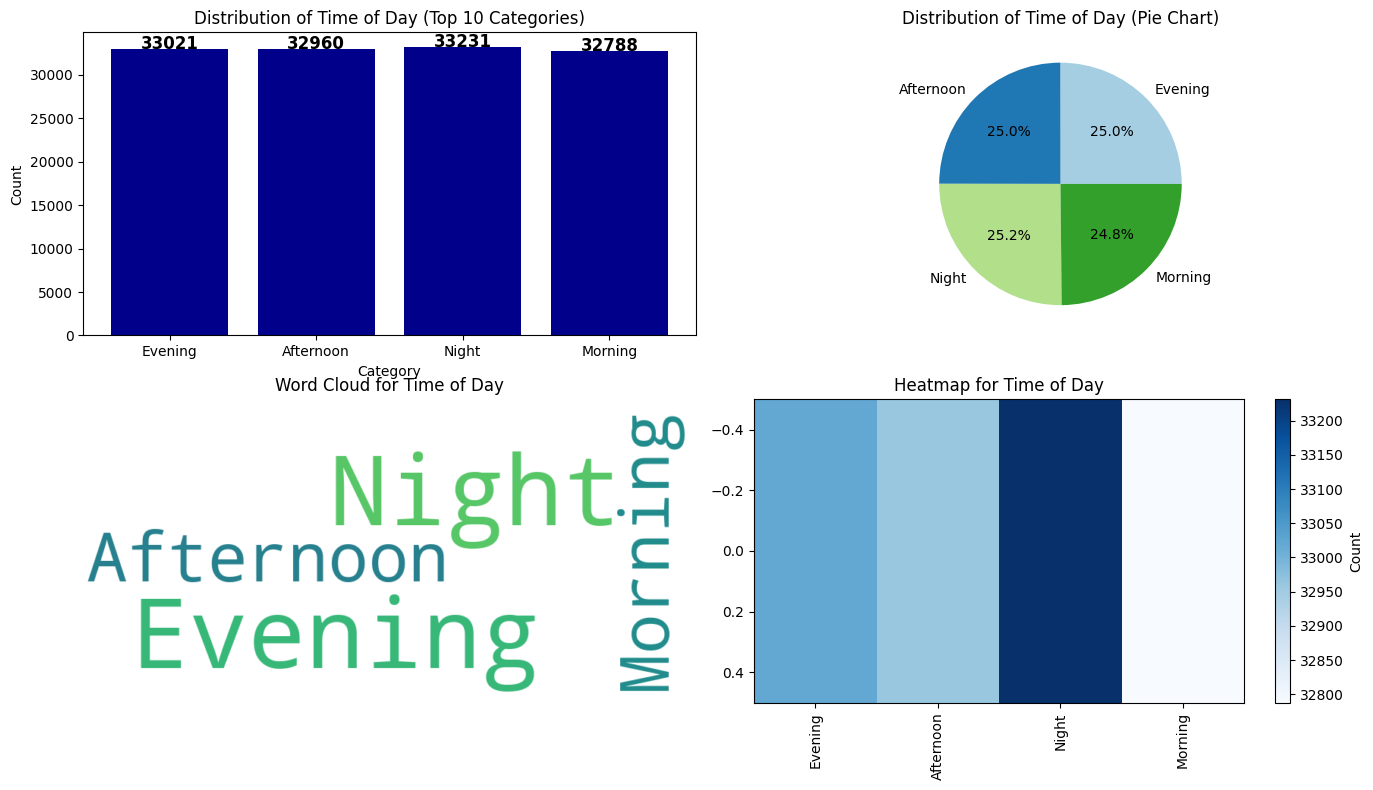


Basic Analysis of 'Time of Day':
Total unique values (Top 10 with 'Others'): 4
Evening: 33021 occurrences
Afternoon: 32960 occurrences
Night: 33231 occurrences
Morning: 32788 occurrences
1. Analyze Two Numeric Columns
2. Analyze One Numeric and One String
3. Analyze One Numeric Column
4. Return
1. General Analysis
2. Custom Analysis
3. Return
1. Analyze CSV File
2. Analyze Parquet File
3. Analyze Excel File
4. Return
1. Analyze Data
2. Edit Data
3. Cleaning Data
4. Sort Folder
5. Exit
Exiting Program...


In [ ]:
b=True
while(b):
    print("1. Analyze Data")
    print("2. Edit Data")
    print("3. Cleaning Data")
    print("4. Sort Folder")
    print("5. Exit")
    choice=input("Enter Choice: ")
    if(choice=="1"):
        Load_Data()
    elif(choice=="2"):
        print(2)
        pass
    elif(choice=="3"):
        print(3)
        pass
    elif(choice=="4"):
        print(4)
    elif(choice=="5"):
          print("Exiting Program...")
          b=False
    else:
        print("Please Enter Valid Choice !")
# C:\\Users\\Shivam\\Downloads\\Diwali Sales Data.csv
# C:\\Users\\Shivam\\Downloads\\road_accident_dataset.csv
# D:\\shivam
